In [0]:
import matplotlib.pyplot as plt
# for network visualizations
import networkx as nx

In [0]:
d  = nx.read_edgelist('/content/youtube-combined.txt', create_using = nx.Graph(), nodetype = int)

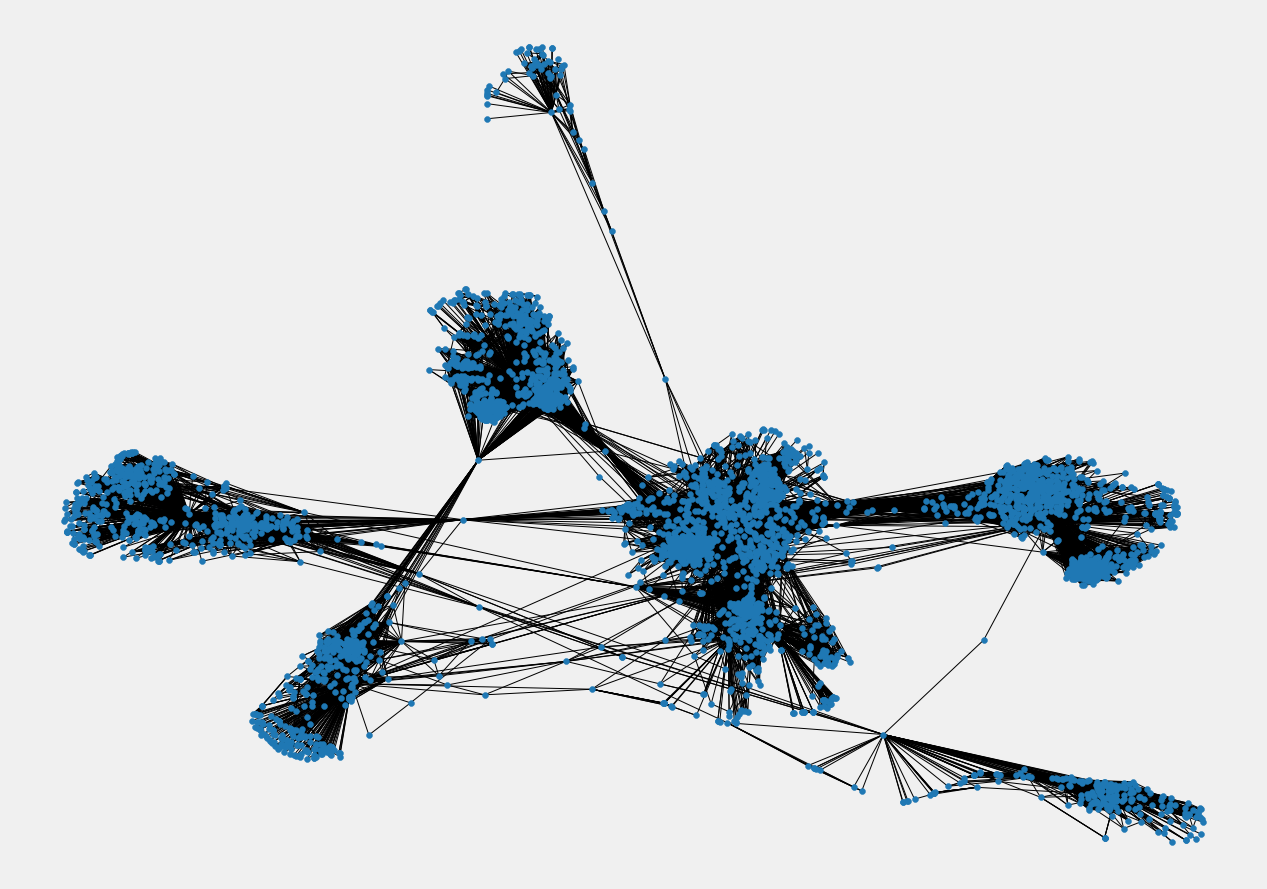

In [0]:
pos = nx.spring_layout(d)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(d, pos, with_labels = False, node_size = 35)
plt.show()



* Seed users are selected based on users with a highest number of links






In [0]:
users = []
for i in range(5):
  A=max(dict(d.degree()).items(), key = lambda x : x[1])
  users.append(A[0])
  d.remove_node(A[0])



* We assigned a new variable to graph because we removed few nodes to variable that are assigned previously





In [0]:
G  = nx.read_edgelist('/content/youtube-combined.txt', create_using = nx.Graph(), nodetype = int)



*   L is the list of list of nodes in detected communities
*   G is the list of graphs of detected community



In [0]:
L=[[],[],[],[],[],[]]
GGG = []

Algorithm :
1. Identify a user of interest as the seed node and include this user as part of the community. This user could be most influential person like CEO, head master… or a node with more number of links
2. Retrieve all neighbouring nodes of the seed node. Include these 1st degree neighbours as part of the community. 
3. Retrieve all the 2nd degree neighbours of the seed node. Include them as part of the community if they satisfy our deﬁnition of a community as stated in Equation 1.
4. Repeat Step 3 for the 3rd, 4th, nth degree neighbours until no further nodes can be added to the community.
5. The eventual list of included nodes would be the community centred at the seed node.


In [0]:
def community(G,L,GGG,node):
  N = list(G.neighbors(node))
  L.append(node)
  for j in N:
    L.append(j)
  Add = []
  Add1 = []
  for j in range(1,len(L)):
    M=list(G.neighbors(L[j]))
    for k in range(len(M)):
      if M[k] not in L:
        MM = list(G.neighbors(M[k]))
        for l in range(len(MM)):
          kout,kin = 0,0
          if MM[l] not in L:
            kout = kout+1
          else:
            kin = kin+1
        if kin>kout*4:
          Add.append(M[k])
    while len(Add)!=0:
      Add1.clear()
      for x in Add:
        L.append(x)
        Add1.append(x)
      Add.clear()
      for j in range(len(Add1)):
        P = list(G.neighbors(Add1[j]))
        for k in range(len(P)):
          if P[k] not in L:
            PP = list(G.neighbors(P[k]))
            for l in range(len(PP)):
              kout,kin = 0,0
              if PP[l] not in L:
                kout = kout+1
              else:
                kin = kin+1
            if kin>kout*4:
              Add.append(P[k])           
  GGG.append(G.subgraph(L))
  return GGG,L



* Function 'draw' represents the detected community in given main graph G with the assigned color






In [0]:
def draw(G,GG,color):
  aaa=[]
  for i in d.nodes:
    if i not in GG.nodes:
      aaa.append(i)
  nx.draw_networkx_nodes(G,pos,
                       nodelist=GG.nodes,
                       node_color=color,
                       node_size=35,
                   alpha=0.8)
  nx.draw_networkx_nodes(G,pos,
                       nodelist=aaa,
                       node_size=35)
  nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges)

In [0]:
GGG,L[0]=community(G,L[0],GGG,users[0])

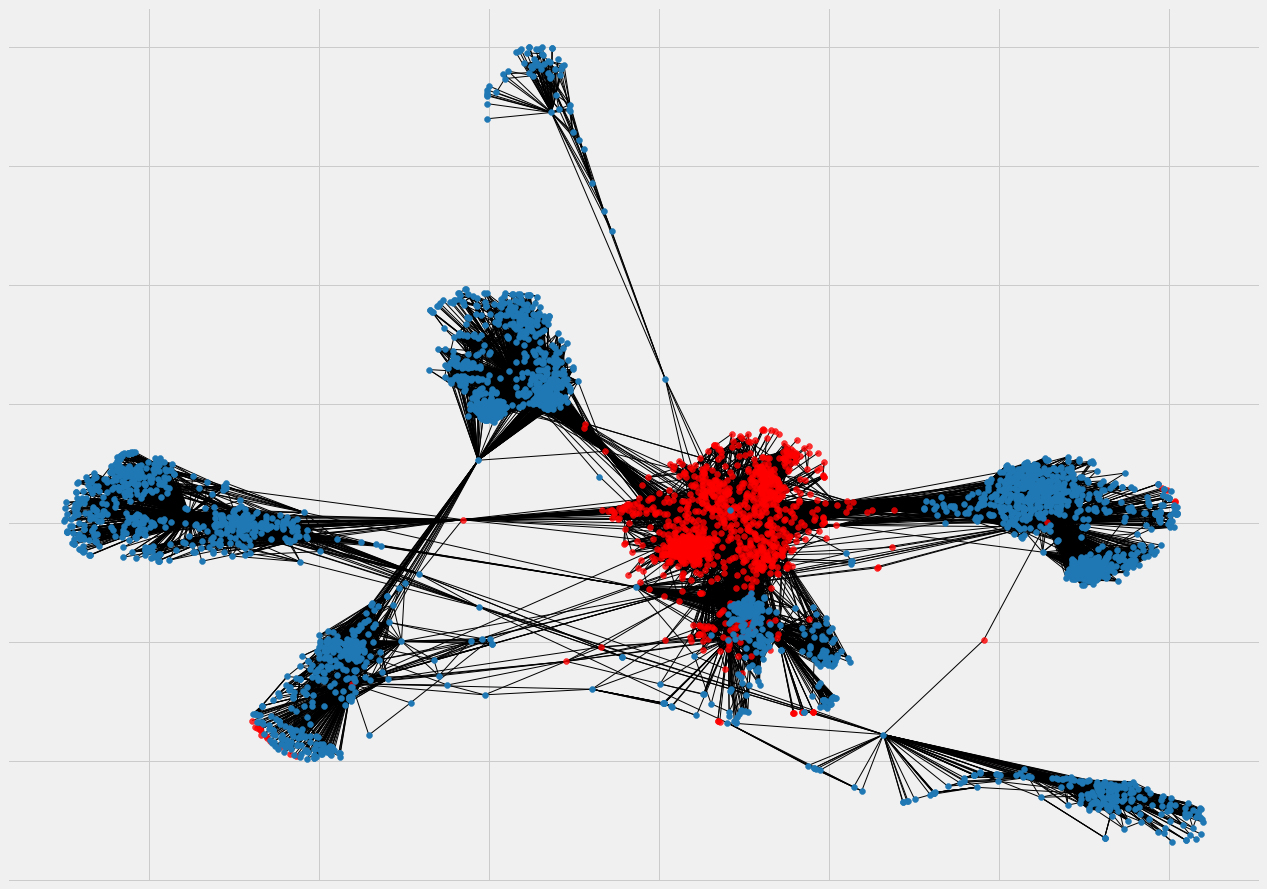

In [0]:
draw(G,GGG[0],'r')

In [0]:
GGG,L[1]=community(G,L[1],GGG,users[1])

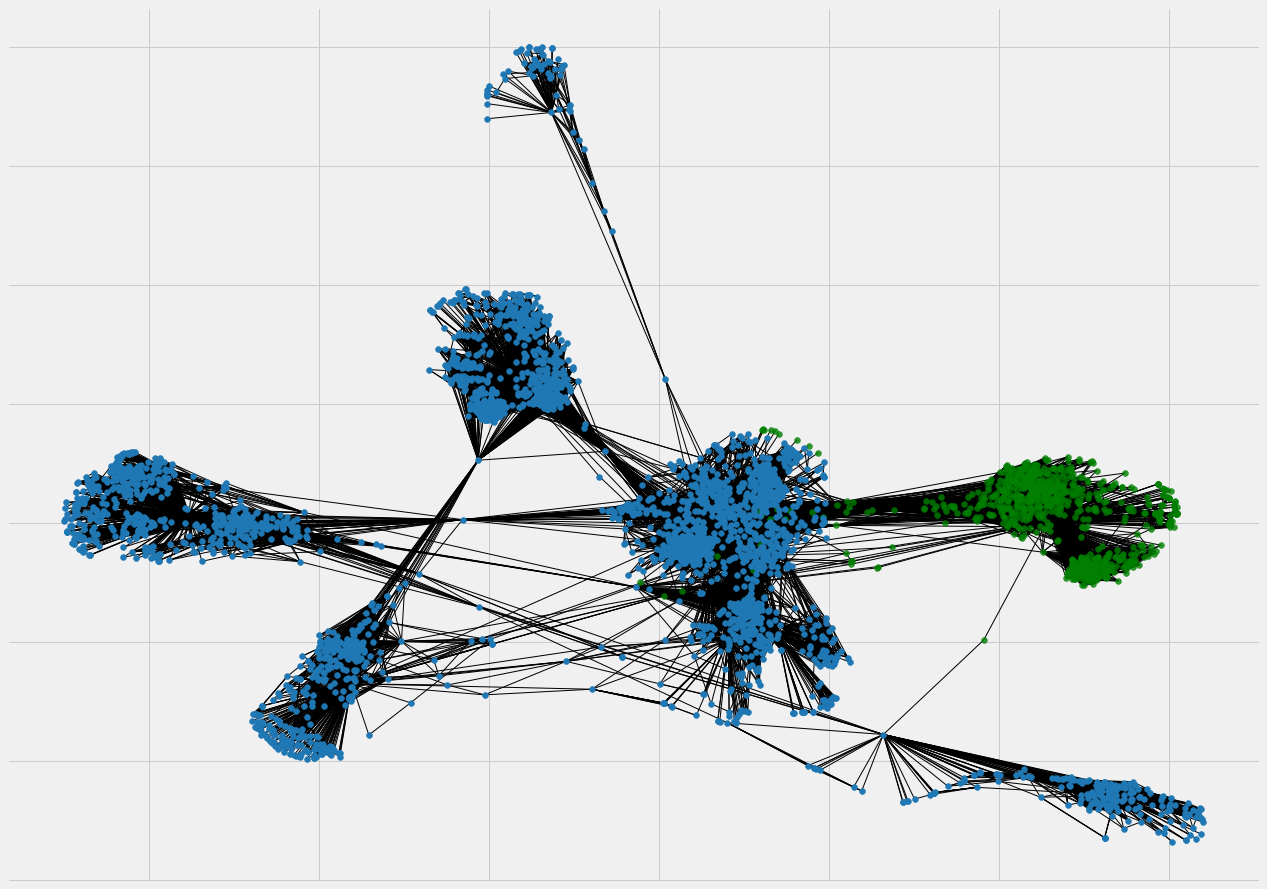

In [0]:
draw(G,GGG[1],'g')

In [0]:
GGG,L[2]=community(G,L[2],GGG,users[2])

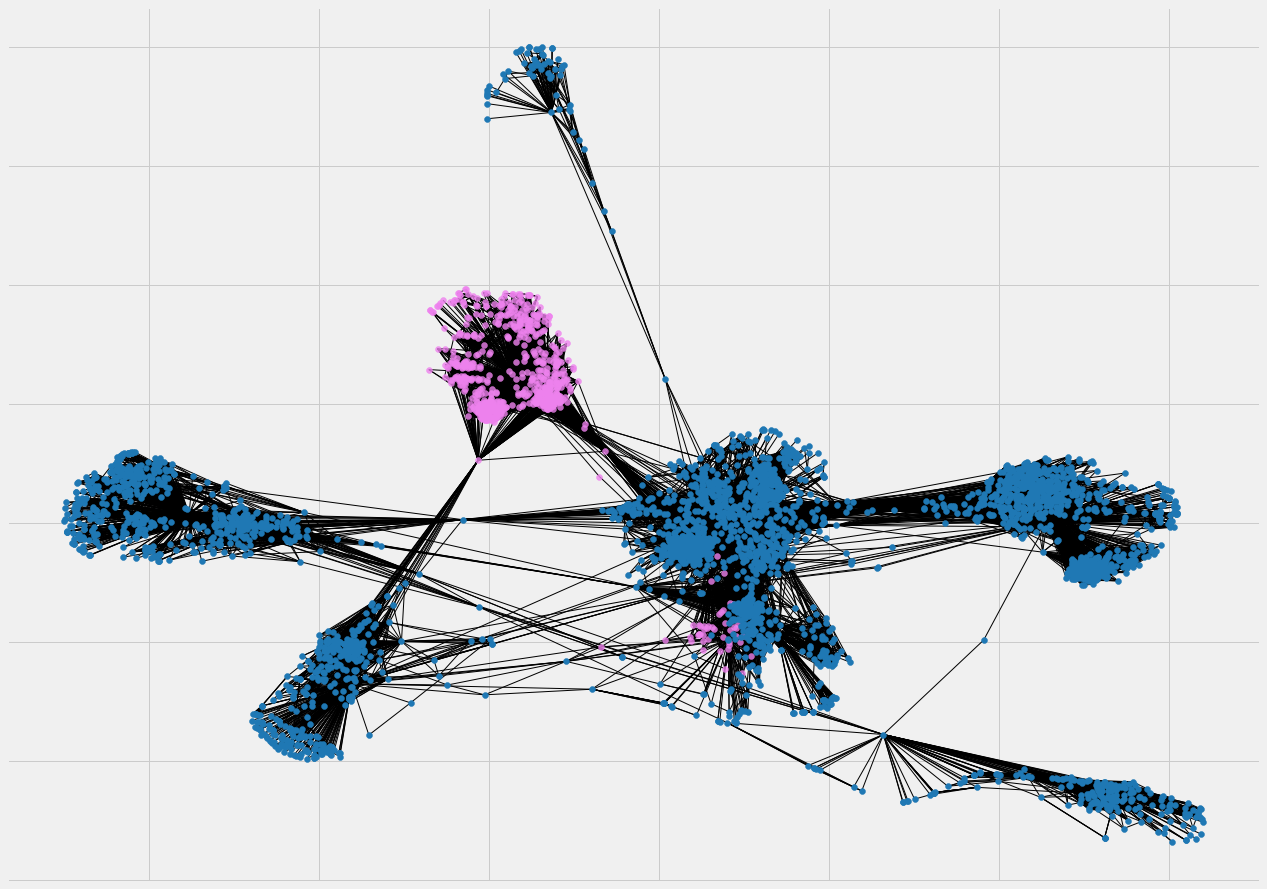

In [0]:
draw(G,GGG[2],'violet')

In [0]:
GGG,L[3]=community(G,L[3],GGG,users[3])

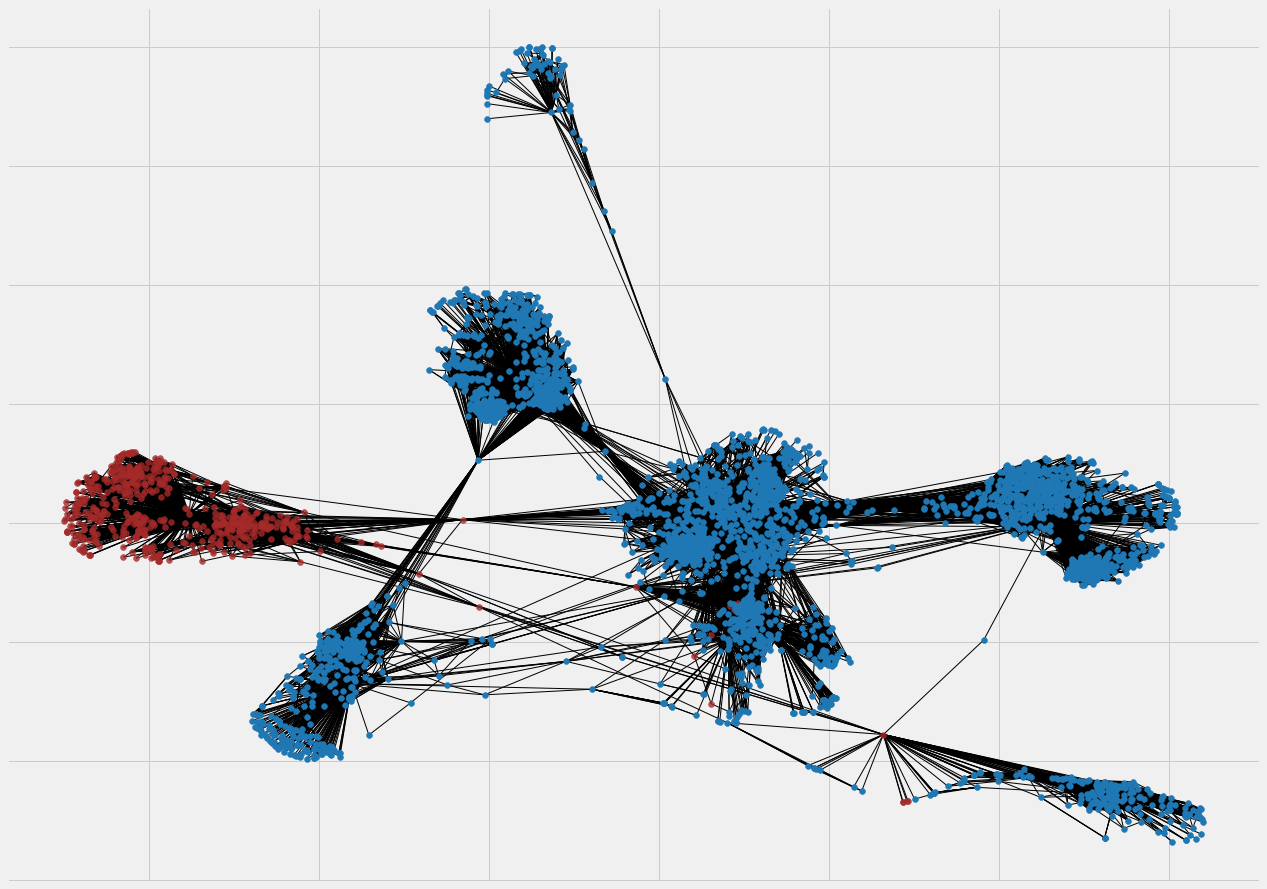

In [0]:
draw(G,GGG[3],'brown')

In [0]:
GGG,L[4]=community(G,L[4],GGG,users[4])

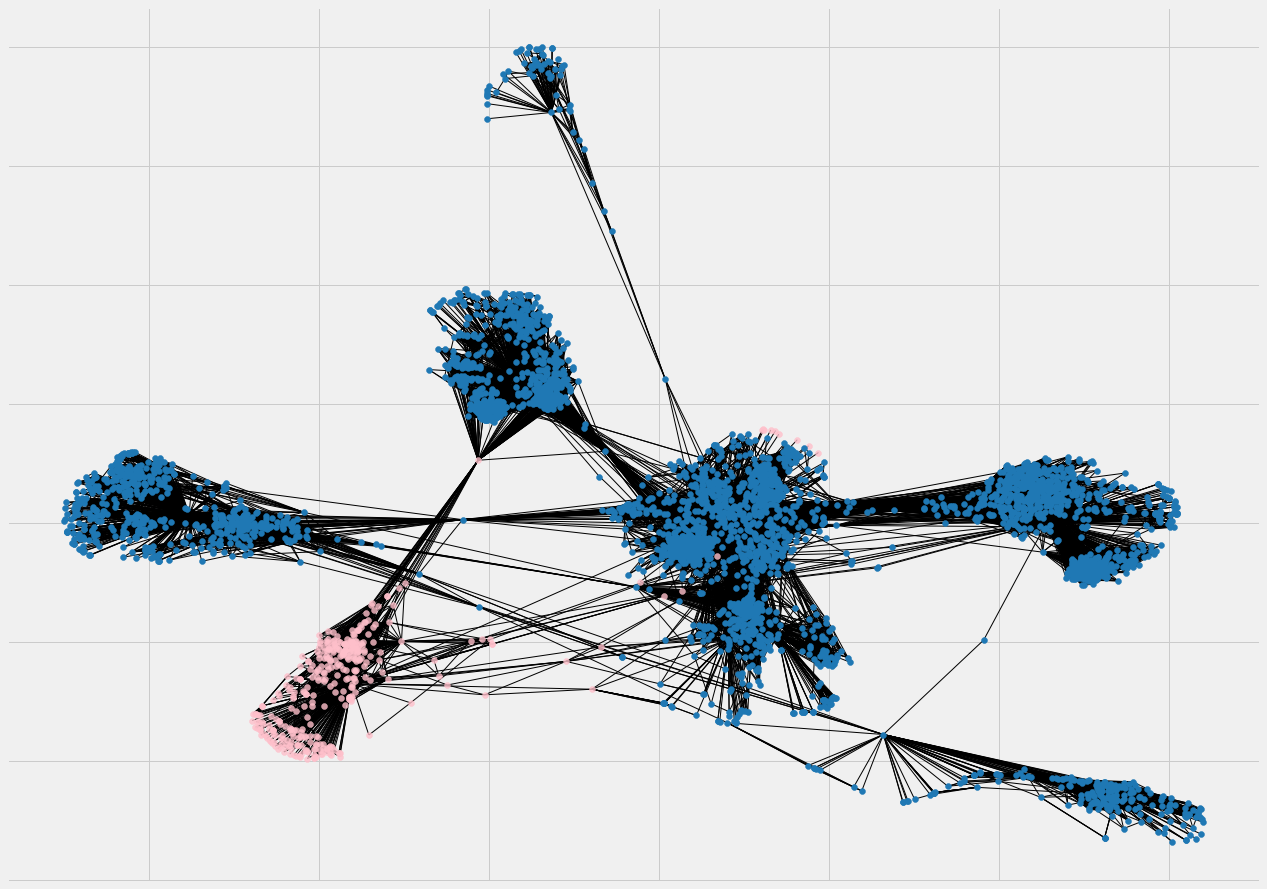

In [0]:
draw(G,GGG[4],'pink')

In [0]:
GGG,L[5]=community(G,L[5],GGG,686)

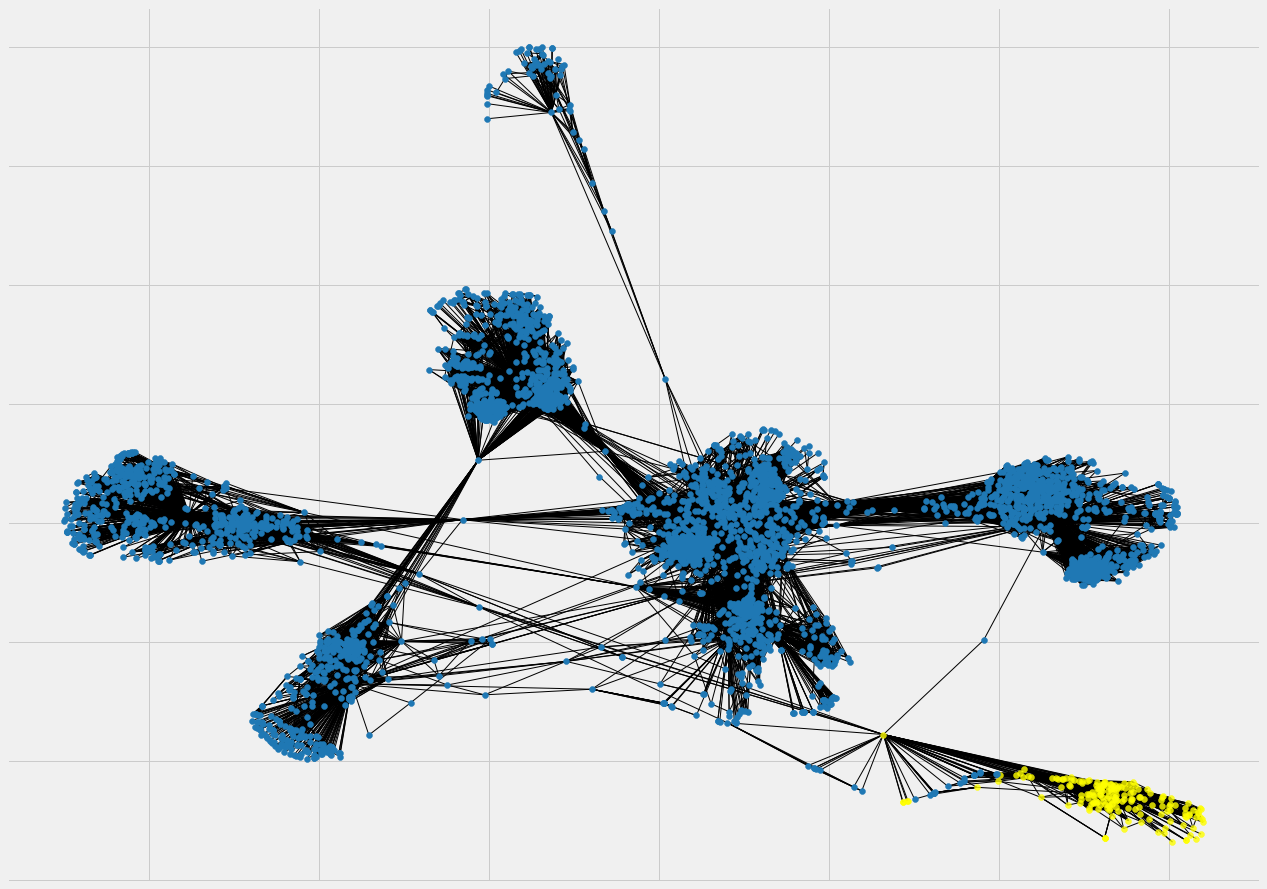

In [0]:
draw(G,GGG[5],'yellow')

Common nodes between communites acts as bridges between communities

* List inter2 - Number of nodes that has atleast two communities in common
* List inter3 - Number of nodes that has atleast three communities in common
* List inter4 - Number of nodes that has atleast four communities in common
* List inter5 - Number of nodes that has atleast five communities in common
* List inter6 - Number of nodes that has atleast six communities in common












In [0]:
inter2=[]
for i in range(6):
  for j in range(i+1,6):
    for k in L[i]:
      if k in L[j]:
        inter2.append(k)
inter3=[]
for i in range(6):
  for j in range(i+1,6):
    for l in range(j+1,6):
      for k in L[i]:
        if k in L[j] and k in L[l]:
          inter3.append(k)
inter4=[]
for i in range(6):
  for j in range(i+1,6):
    for l in range(j+1,6):
      for m in range(l+1,6):
        for k in L[i]:
          if k in L[j] and k in L[l] and k in L[m]:
            inter4.append(k)
inter5=[]
for i in range(6):
  for j in range(i+1,6):
    for l in range(j+1,6):
      for m in range(l+1,6):
        for n in range(m+1,6):
          for k in L[i]:
            if k in L[j] and k in L[l] and k in L[m] and k in L[n]:
              inter4.append(k)
inter6=[]
for k in L[0]:
  if k in L[1] and k in L[2] and k in L[3] and k in L[4] and k in L[5]:
    inter6.append(k)

In [0]:
aaa=[]
for i in G.nodes:
  if i not in inter2:
    aaa.append(i)



* In the graph, nodes with red color and size 35 denotes users that has exactly two communities in common
* In the graph, nodes with green color and size 100 denotes users that has exactly three communities in common
* In the graph, nodes with pink color and size 1000 denotes users that has exactly four communities in common





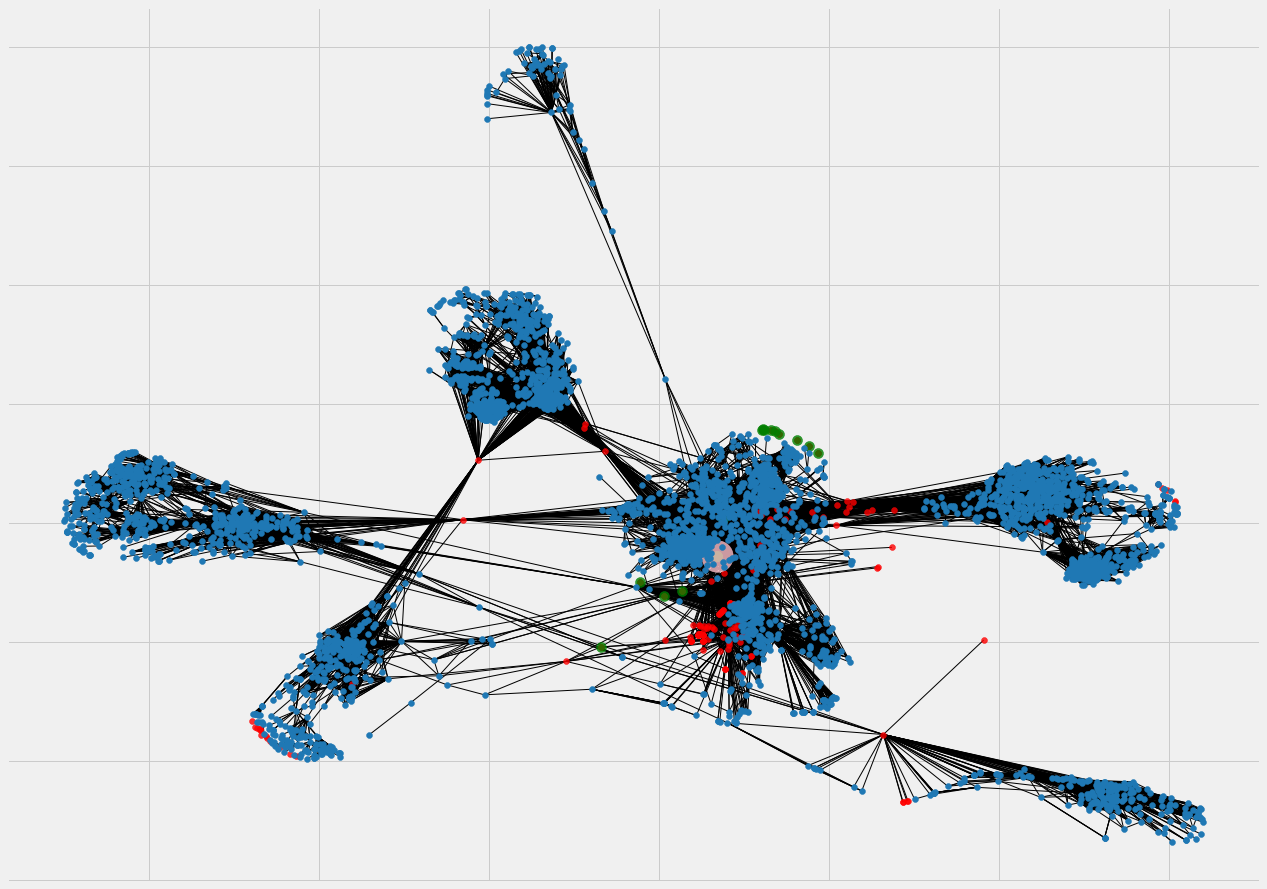

In [0]:
nx.draw_networkx_nodes(G,pos,
                       nodelist=inter2,
                       node_color = 'r',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=inter3,
                       node_color = 'g',
                       node_size=100,
                   alpha=0.8)

nx.draw_networkx_nodes(G,pos,
                       nodelist=inter4,
                       node_color = 'pink',
                       node_size=1000,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=aaa,
                       node_size=35)

nx.draw_networkx_edges(G,pos,
                       edgelist=d.edges)

In [0]:
aaa.clear()
for i in d.nodes:
  if i not in GGG[0].nodes and i not in GGG[1].nodes and i not in GGG[2].nodes and i not in GGG[3].nodes and i not in GGG[4].nodes and i not in GGG[5].nodes:
    aaa.append(i)



* In the graph, nodes with red color and size 35 represents first community centered around users[0]
* In the graph, nodes with green color and size 35 represents second community centered around users[1]
* In the graph, nodes with violet color and size 35 represents third community centered around users[2]
* In the graph, nodes with brown color and size 35 represents fourth community centered around users[3]
* In the graph, nodes with pink color and size 35 represents fifth community centered around users[4]
* In the graph, nodes with yellow color and size 35 represents sixth community centered around node 686
* In the graph, nodes with color code '#F5F5DC' and size 35 denotes users that has exactly two communities in common
* In the graph, nodes with color code '#708090' and size 100 denotes users that has exactly three communities in common
* In the graph, nodes with white color and size 1000 denotes users that has exactly four communities in common
* In the graph users[0],users[1],users[2],users[3],users[4] and node 686 represented with color code '#483C32' and size 1000




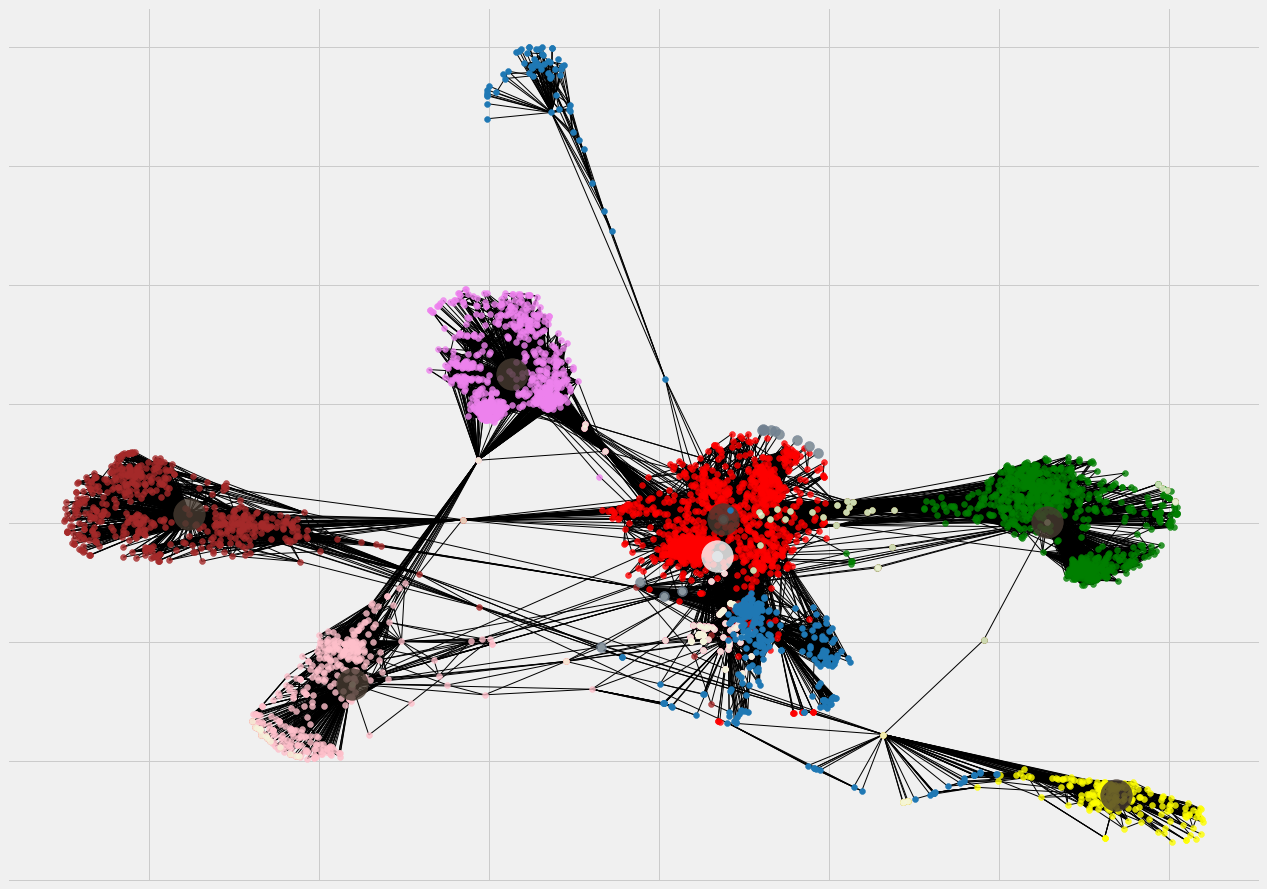

In [0]:
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[0].nodes,
                       node_color='r',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[1].nodes,
                       node_color='g',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[2].nodes,
                       node_color='violet',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[3].nodes,
                       node_color = 'brown',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[4].nodes,
                       node_color = 'pink',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=GGG[5].nodes,
                       node_color = 'yellow',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=inter2,
                       node_color = '#F5F5DC',
                       node_size=35,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=inter3,
                       node_color = '#708090',
                       node_size=100,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=inter4,
                       node_color = 'white',
                       node_size=1000,
                   alpha=0.8)

nx.draw_networkx_nodes(G,pos,
                       nodelist=[users[0],users[1],users[2],users[3],users[4],686],
                       node_color = '#483C32',
                       node_size=1000,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=aaa,
                       node_size=35)

nx.draw_networkx_edges(G,pos,
                       edgelist=G.edges)




* As a control group of network statistics, we selected the largest connected compoment from the set of users



In [0]:
Gc = max(nx.connected_components(G), key=len)

In [0]:
GGc = G.subgraph(list(Gc))

In [0]:
Nodec = len(list(Gc))
Node0 = len(GGG[0].nodes)
Node1 = len(GGG[1].nodes)
Node2 = len(GGG[2].nodes)
Node3 = len(GGG[3].nodes)
Node4 = len(GGG[4].nodes)
Node5 = len(GGG[5].nodes)
maxnodes = max(Node0,Node1,Node2,Node3,Node4,Node5)
minnodes = min(Node0,Node1,Node2,Node3,Node4,Node5)
avgnodes = (Node0+Node1+Node2+Node3+Node4+Node5)/6
print("Maximum number of nodes among detected communities =",maxnodes)
print("Minimum number of nodes among detected communities =",minnodes)
print("Average number of nodes among detected communities detected communities =",avgnodes)
print("Number of nodes in control group =",Nodec)

Maximum number of nodes among detected communities = 1140
Minimum number of nodes among detected communities = 176
Average number of nodes among detected communities detected communities = 641.1666666666666
Number of nodes in control group = 4039


In [0]:
def avgdegree(G):
  ssss=0
  for i in range(len(list(G.degree))):
    ssss = ssss+list(G.degree)[i][1]
  return ssss/len(G.nodes)
  

In [0]:
degreec = avgdegree(GGc)
degree0 = avgdegree(GGG[0])
degree1 = avgdegree(GGG[1])
degree2 = avgdegree(GGG[2])
degree3 = avgdegree(GGG[3])
degree4 = avgdegree(GGG[4])
degree5 = avgdegree(GGG[5])
maxdegree = max(degree0,degree1,degree2,degree3,degree4,degree5)
mindegree = min(degree0,degree1,degree2,degree3,degree4,degree5)
avgdegree = (degree0+degree1+degree2+degree3+degree4+degree5)/6
print("Maximum average degree links among detected communities =",maxdegree)
print("Minimum average degree links among detected communities =",mindegree)
print("Average degree links among detected communities =",avgdegree)
print("Average degree links in control group =",degreec)

Maximum average degree links among detected communities = 77.5168961201502
Minimum average degree links among detected communities = 16.027855153203344
Average degree links among detected communities = 36.633623307671066
Average degree links in control group = 43.69101262688784


In [0]:
clusterc = nx.average_clustering(GGc)
cluster0 = nx.average_clustering(GGG[0])
cluster1 = nx.average_clustering(GGG[1])
cluster2 = nx.average_clustering(GGG[2])
cluster3 = nx.average_clustering(GGG[3])
cluster4 = nx.average_clustering(GGG[4])
cluster5 = nx.average_clustering(GGG[5])
maxcluster = max(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5)
mincluster = min(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5)
avgcluster = (cluster0+cluster1+cluster2+cluster3+cluster4+cluster5)/6
print("Maximum clustering coefficient among detected communities =",maxcluster)
print("Minimum clustering coefficient among detected communities =",mincluster)
print("Average clustering coefficient among detected communities =",avgcluster)
print("Average clustering coefficient in control group =",clusterc)

Maximum clustering coefficient among detected communities = 0.665502361733596
Minimum clustering coefficient among detected communities = 0.5320192717517874
Average clustering coefficient among detected communities = 0.6040314501474269
Average clustering coefficient in control group = 0.6055467186200876


In [0]:
lengthc = nx.average_shortest_path_length(GGc)
length0 = nx.average_shortest_path_length(GGG[0])
length1 = nx.average_shortest_path_length(GGG[1])
length2 = nx.average_shortest_path_length(GGG[2])
length3 = nx.average_shortest_path_length(GGG[3])
length4 = nx.average_shortest_path_length(GGG[4])
length5 = nx.average_shortest_path_length(GGG[5])
maxlength = max(length0,length1,length2,length3,length4,length5)
minlength = min(length0,length1,length2,length3,length4,length5)
avglength = (length0+length1+length2+length3+length4+length5)/6
print("Maximum Path length among detected communities =",maxlength)
print("Minimum Path length among detected communities =",minlength)
print("Average Path length among detected communities =",avglength)
print("Average Path length in control group =",lengthc)

Maximum Path length among detected communities = 2.107239345070314
Minimum Path length among detected communities = 1.921038961038961
Average Path length among detected communities = 2.014762210410511
Average Path length in control group = 3.6925068496963913


In [0]:
diameterc = nx.diameter(GGc)
diameter0 = nx.diameter(GGG[0])
diameter1 = nx.diameter(GGG[1])
diameter2 = nx.diameter(GGG[2])
diameter3 = nx.diameter(GGG[3])
diameter4 = nx.diameter(GGG[4])
diameter5 = nx.diameter(GGG[5])
maxdiameter = max(diameter0,diameter1,diameter2,diameter3,diameter4,diameter5)
mindiameter = min(diameter0,diameter1,diameter2,diameter3,diameter4,diameter5)
avgdiameter = (diameter0+diameter1+diameter2+diameter3+diameter4+diameter5)/6
print("Maximum diameter among detected communities =",maxdiameter)
print("Minimum diameter among detected communities =",mindiameter)
print("Average diameter among detected communities =",avgdiameter)
print("Diameter in control group =",diameterc)

Maximum diameter among detected communities = 5
Minimum diameter among detected communities = 3
Average diameter among detected communities = 3.6666666666666665
Diameter in control group = 8
